# Gestion des nan pour le sous-tableau `Evaporation`

Etape 3 du pipeline

Ce template est réutilisable pour les autres sous-tableau en adaptant.
A terme, il faudra en faire un fichier .py intégré au pipeline.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Définition des paramètres esthétiques généraux
sns.set_theme(style = "whitegrid", palette = "bright")
sns.set()

df = pd.read_csv("../../data/raw/weatherAUS.csv")

### LIGNE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER
df_not_E = pd.read_csv("../../data/interim/omar/Evaporation.csv")

## 1. Vérification de la bonne création du csv: Les stations correspondent-elles?

In [2]:
### CELLULE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER

# Liste des stations dans `Evaporation`
print(df_not_E['Location'].unique())
print ("Il y a", df_not_E['Location'].unique().shape[0] , "stations dans le tableau crée.")

['PearceRAAF']
Il y a 1 stations dans le tableau crée.


In [3]:
# Création du dictionnaire clé = station, valeurs = grandeurs non mesurées
dict = {}
for i in range(df['Location'].unique().shape[0]):  # df['Location'].unique().shape[0]: le nombre de stations
    measures = []
    non_measures = []
    station_df = df.loc[df['Location'] == df['Location'].unique()[i]] #création d'un df pour une station
    for col in station_df.columns:
        if station_df[col].isna().sum()/station_df.shape[0] != 1: # si le pourcentage de nan est différent de 1
            measures.append(col) # on ajoute la grandeur mesurée à 'measures
        else:
            non_measures.append(col) # sinon, on l'ajoute à 'non_measures'
    if non_measures == []:
        dict[df['Location'].unique()[i]] = ['all']
    else:
        dict[df['Location'].unique()[i]] = non_measures

### Liste des différentes modalités de non-mesures:
modalites = []
for station in dict:
    if dict[station] not in modalites:
        modalites.append(dict[station])

### Création du dictionnaire inverse: clé = liste concaténée des grandeurs non mesurées, valeurs = liste des stations correspondantes
dict_reverse = {}
for i, mod in zip(range(len(modalites)), modalites):
    liste_stations = []
    for station in dict:
        if dict[station] == mod:
            liste_stations.append(station)
    dict_reverse["_".join(modalites[i])] = liste_stations # J'ai appris qu'un dictionnaire ne peut pas prendre de liste en guise de clé. 
                                                          #J'ai décidé de concaténer le nom des colonnes non mesurées avec un "_"       
    #print(mod, ":", liste_stations) 

### LIGNES À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER
print(dict_reverse["Evaporation"])
print("Il y a", len(dict_reverse["Evaporation"]), "stations au départ dans le tableau original")

['PearceRAAF']
Il y a 1 stations au départ dans le tableau original


## 2. Gestion des nan

In [4]:
### CELLULE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER

# Reset df sur le tableau séparé
df = pd.read_csv("Evaporation.csv")

In [5]:
### CELLULE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER

# Sélection des variables à remplacer par la moyenne
mean_var = ['MinTemp', 
            'MaxTemp', 
            'Sunshine', 
            'WindGustSpeed', 
            'WindSpeed9am', 
            'WindSpeed3pm', 
            'Humidity9am', 
            'Humidity3pm', 
            'Pressure9am', 
            'Pressure3pm', 
            'Cloud9am', 
            'Cloud3pm', 
            'Temp9am', 
            'Temp3pm', 
            'WindGustDirNum', 
            'WindDir9amNum', 
            'WindDir3pmNum']
left_over = ['Rainfall']

#Sélection des variables catégorielles à remplacer par le mode:
mode_var =['WindGustDir', 
           'WindDir9am', 
           'WindDir3pm'] # sélection des variables catégorielles à remplacer

In [6]:
# Remplacement des nan par la moyenne ou le mode le plus fréquent:

for station in df['Location'].unique():
    dict_mean_values = {} # Initialisation dictionnaire pour les valeurs moyennes des variables numériques
    dict_mode_values = {} # Initialisation dictionnaire pour les valeurs les plus fréquentes des variables catégorielles
    
    data = df.loc[df['Location'] == station].copy() # je n'ai pas trouvé d'autre solutions que celle ci, qui me parait un peu lourde niveau mémoire, puisqu'elle nécéssite de créer une copie pour chaque station. Mais je m'arête là car ça marche.
    
    for var in mean_var:   #Création du dictionnaire pour les valeurs moyennes des variables numériques
        if var == 'Cloud9am' or var == 'Cloud3pm':             # Test spécifique sur les Clouds pour arrondir la moyenne
            dict_mean_values[var] = round(data[var].mean(), 0)
        else:
            dict_mean_values[var] = data[var].mean()
    
    for var in mode_var:   #Création du dictionnaire pour les valeurs les plus fréquentes des variables catégorielles
        dict_mode_values[var] = data[var].mode()[0]
    
    data.fillna(value = dict_mean_values, inplace = True)
    data.fillna(value = dict_mode_values, inplace = True)
    df.fillna(data, inplace = True)

In [7]:
# Déja fait en préproc:
# Drop les NaN de la variable cible.
#df.dropna(subset = 'RainTomorrow', inplace = True)

# Drop les NaN de la variable RainToday.
#df.dropna(subset = 'RainToday', inplace = True)

In [8]:
# Vérification du taux de nan:
round(df.isna().sum()/df.shape[0] *100, 2)
# Les grandeurs sélectionnées sont à zéro: tout a bien fonctionné.

Unnamed: 0.1      0.0
Unnamed: 0        0.0
Date              0.0
Location          0.0
MinTemp           0.0
MaxTemp           0.0
Rainfall          0.0
Sunshine          0.0
WindGustDir       0.0
WindGustSpeed     0.0
WindDir9am        0.0
WindDir3pm        0.0
WindSpeed9am      0.0
WindSpeed3pm      0.0
Humidity9am       0.0
Humidity3pm       0.0
Pressure9am       0.0
Pressure3pm       0.0
Cloud9am          0.0
Cloud3pm          0.0
Temp9am           0.0
Temp3pm           0.0
RainToday         0.0
RainTomorrow      0.0
year              0.0
month             0.0
day               0.0
LocationNum       0.0
WindGustDirNum    0.0
WindDir9amNum     0.0
WindDir3pmNum     0.0
Latitude          0.0
Longitude         0.0
CodeRegion        0.0
NonMes            0.0
CodeRegionNum     0.0
NonMesNum         0.0
dtype: float64

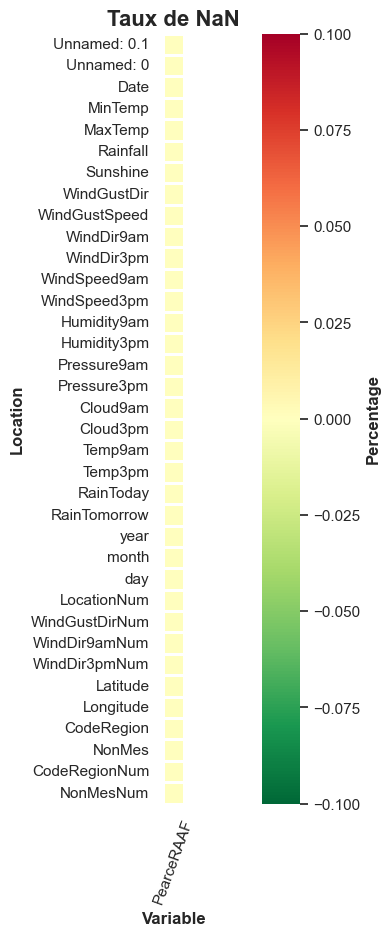

In [9]:
# On le vérifie sur la heatmap des nan:
def nan_rate_count(col):
    nr = round(col.isna().sum()/col.shape[0]*100, 2)
    return nr

nan_map = df.groupby('Location').agg(nan_rate_count)

plt.figure(figsize = (20,10))
ax = sns.heatmap(nan_map.T, annot = False, cmap = "RdYlGn_r", square = True, linewidth = 1, annot_kws={"size":6}, fmt=".0f", cbar_kws = {"label": "Percentage"})

## Mise en forme
plt.title("Taux de NaN", fontweight = "bold", fontsize = 16)
plt.xlabel("Variable", fontweight = "bold")
plt.ylabel("Location", fontweight = "bold")
plt.xticks(rotation = 70)
cbar_axes = ax.figure.axes[-1].yaxis.label.set_weight("bold")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    2646 non-null   int64  
 1   Unnamed: 0      2646 non-null   int64  
 2   Date            2646 non-null   object 
 3   Location        2646 non-null   object 
 4   MinTemp         2646 non-null   float64
 5   MaxTemp         2646 non-null   float64
 6   Rainfall        2646 non-null   float64
 7   Sunshine        2646 non-null   float64
 8   WindGustDir     2646 non-null   object 
 9   WindGustSpeed   2646 non-null   float64
 10  WindDir9am      2646 non-null   object 
 11  WindDir3pm      2646 non-null   object 
 12  WindSpeed9am    2646 non-null   float64
 13  WindSpeed3pm    2646 non-null   float64
 14  Humidity9am     2646 non-null   float64
 15  Humidity3pm     2646 non-null   float64
 16  Pressure9am     2646 non-null   float64
 17  Pressure3pm     2646 non-null   f

In [11]:
# Préparation de la suppression des variables catégorielles:

# Mise au format datetime de la colonne 'Date':
df['Date'] = pd.to_datetime(df['Date'])
df.head()

### LIGNE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER
# Suppression des variables Unnamed
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'NonMesNum'], inplace = True)

# Suppression des variables catégorielles:
drop_cat = df.select_dtypes(object).columns
df.drop(columns = drop_cat, inplace = True)

### LIGNE À ADAPTER EN FONCTION DU SOUS-TABLEAU À TRAITER
# Création du csv final prêt pour la modélisation
df.to_csv("ready_Evaporation.csv")